# 주제: 머신러닝_수요예측

### 라이브러리선언 및 데이터 불러오기

In [63]:
### 데이터 다루는 라이브러리
import pandas as pd
import numpy as np
### 머신러닝 라이브러리
from sklearn import tree
### 시각화 라이브러리
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
# github -> github.com/hyokwan python-lecture -> dataset -> "raw" url!!!
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData = pd.read_csv(dataUrl)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


In [10]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

### 1. 데이터 타입통합 및 특성숫자컬럼 추가

In [12]:
featuresData["YEARWEK"] = featuresData.YEARWEEK.astype(int)

In [20]:
featuresData.columns = featuresData.columns.str.upper()

In [31]:

# 라벨링할 데이터에 대해서 중복을 제거한 카테고리를
# 수집한 재료 휴일정보, 할인정보, 프로모션
featuresData.PROMOTION.drop_duplicates()
ynLabel = LabelEncoder()
featuresData["LE_HOLIDAY"] = ynLabel.fit_transform( featuresData.HOLIDAY )
featuresData["LE_PROMOTION"] = ynLabel.fit_transform( featuresData.PROMOTION )

### 2. 특성선정 및 데이터 분리

In [50]:
## 상관계수 표준 설정 ★ 데이터가 변경 시 변경 포인트!
label=["QTY"]

corrStd = 0.5
corrDf = featuresData.corr(numeric_only=True)
features = list(  corrDf.loc[ (abs( corrDf[ label[0] ] ) >= corrStd ) &
                ( abs( corrDf[ label[0] ] ) != 1 ) ].index )
features

['HCLUS', 'PRO_PERCENT', 'LE_HOLIDAY', 'LE_PROMOTION']

In [54]:
randomValue = 30

In [62]:
trainData,testData = train_test_split(featuresData,
                 test_size=0.2,
                 random_state=randomValue)
trainDataFeatures = trainData.loc[ :, features ]
trainDataLabel = trainData.loc[ :, label ]
testDataFeatures = testData.loc[ :, features ]
testDataLabel = testData.loc[ :, label ]
print(trainDataFeatures.shape)
print(trainDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### 3. 모델 생성 및 훈련

In [67]:
from sklearn import tree
from sklearn.tree import plot_tree

In [65]:
dtModel = tree.DecisionTreeRegressor(random_state=randomValue)

In [66]:
fittedDtModel = dtModel.fit( trainDataFeatures, trainDataLabel )

[Text(0.39903846153846156, 0.9285714285714286, 'x[1] <= 0.259\nsquared_error = 678824.471\nsamples = 84\nvalue = 1253.202'),
 Text(0.17307692307692307, 0.7857142857142857, 'x[1] <= 0.104\nsquared_error = 275912.341\nsamples = 51\nvalue = 838.824'),
 Text(0.07692307692307693, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 65686.055\nsamples = 17\nvalue = 341.941'),
 Text(0.038461538461538464, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.11538461538461539, 0.5, 'squared_error = 62693.234\nsamples = 16\nvalue = 362.375'),
 Text(0.2692307692307692, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 195856.43\nsamples = 34\nvalue = 1087.265'),
 Text(0.19230769230769232, 0.5, 'x[1] <= 0.224\nsquared_error = 200358.691\nsamples = 9\nvalue = 1340.556'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[1] <= 0.209\nsquared_error = 157896.0\nsamples = 4\nvalue = 1126.0'),
 Text(0.11538461538461539, 0.21428571428571427, 'x[0] <= 1.5\nsquared_error = 176400.0\nsamples = 2\nv

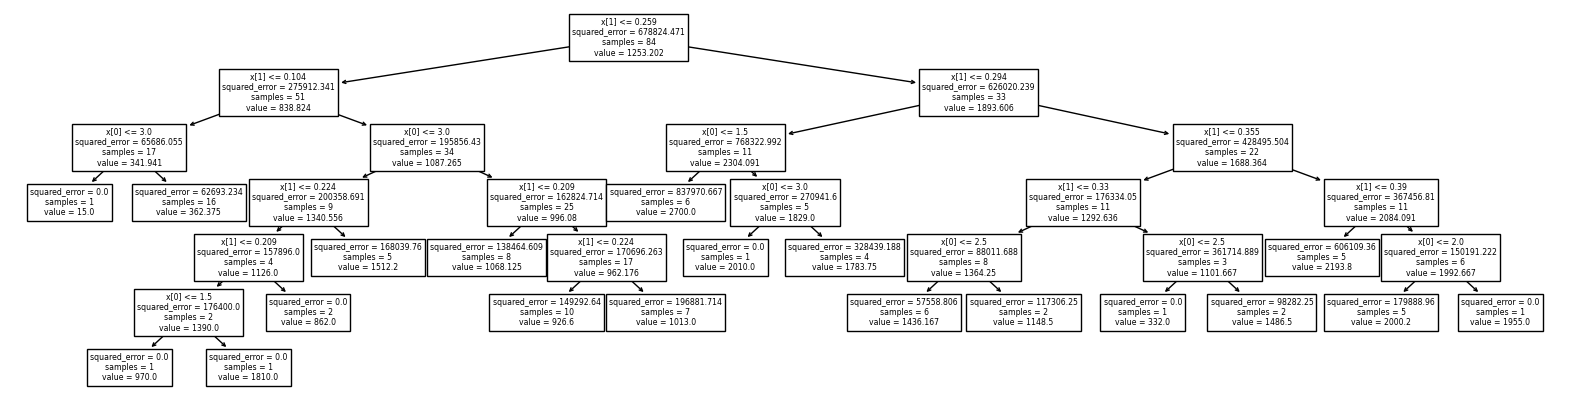

In [70]:
plt.figure( figsize=(20,5))
plot_tree(  fittedDtModel )

### 4 예측

In [77]:
inHclus = 1
inPropercent = 0.4
inHoliday = 1
inPromotion = 1
inDf = pd.DataFrame( [[inHclus, inPropercent, inHoliday, inPromotion ]] )
fittedDtModel.predict( inDf )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2000.2])